In [1]:
import pandas as pd
import numpy as np
import time
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import pdist,squareform, cosine

import itertools

In [2]:
x = joblib.load('essay_sbert_asap7_new')
x_i = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
traits = joblib.load('df_essay7_traits_sum')
x_normed = (x_i-x_i.min(axis=0))/(x_i.max(axis=0)-x_i.min(axis=0))
feats = joblib.load('feat_names12')

In [3]:
score_gb = joblib.load('score_model_gb_normalized_float_sbert')
score_rf = joblib.load('score_model_rf_normalized_float_sbert')
score_rr = joblib.load('score_model_rr_normalized_float_sbert')

## Cosine

In [4]:
dist1d = pdist(x, metric='cosine')
dist1d

array([0.63269904, 0.92661418, 0.56345642, ..., 0.75021832, 0.72659776,
       0.70998596])

In [5]:
iterator = list(itertools.combinations(range(1569),2))
iterator[:5]

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

In [6]:
iterator.index((0,6))

5

In [7]:
dist1d[5]

0.6464136991154772

In [8]:
cosine(x[0],x[6])

0.6464137136936188

In [9]:
#euclidean distance
np.linalg.norm(x[0]-x[6])

0.8412543

In [10]:
# Normalize
# dist1d = dist1d / np.max(dist1d)
# dist1d

In [11]:
# MinMax Normalization
dist1d = (dist1d-min(dist1d))/(max(dist1d)-min(dist1d))
dist1d

array([0.53824988, 0.82233053, 0.47132413, ..., 0.65183693, 0.62900671,
       0.61295075])

In [12]:
iterdist = list(zip(iterator, dist1d))

In [13]:
iterdist

[((0, 1), 0.5382498774283558),
 ((0, 2), 0.8223305306174634),
 ((0, 3), 0.47132413366578685),
 ((0, 4), 0.4748654824691456),
 ((0, 5), 0.6869632935811995),
 ((0, 6), 0.5515056374080013),
 ((0, 7), 0.7527358572719344),
 ((0, 8), 0.15483815245741378),
 ((0, 9), 0.22205999104731197),
 ((0, 10), 0.6200912767373792),
 ((0, 11), 0.5987196984041213),
 ((0, 12), 0.528661404659834),
 ((0, 13), 0.6902700226706876),
 ((0, 14), 0.4703946410898838),
 ((0, 15), 0.5235213916740824),
 ((0, 16), 0.7479446380216483),
 ((0, 17), 0.7572203725874939),
 ((0, 18), 0.7772439160725234),
 ((0, 19), 0.5500649633300058),
 ((0, 20), 0.6190846515550674),
 ((0, 21), 0.6807041977782952),
 ((0, 22), 0.6396221655996225),
 ((0, 23), 0.3018317526054912),
 ((0, 24), 0.5261747649467302),
 ((0, 25), 0.5227259470222785),
 ((0, 26), 0.1658945910068336),
 ((0, 27), 0.5225280736442343),
 ((0, 28), 0.6977100569827105),
 ((0, 29), 0.4934844696085031),
 ((0, 30), 0.606131332851943),
 ((0, 31), 0.13183477143069586),
 ((0, 32), 0.87

In [14]:
iterdist_sorted = sorted(iterdist, key=lambda x: x[1])

iterdist_sorted

[((160, 301), 0.0),
 ((866, 1457), 0.002016880779244091),
 ((9, 425), 0.005066189505231671),
 ((31, 876), 0.007274645917801488),
 ((876, 1083), 0.009403883536264746),
 ((648, 1328), 0.01004212347585418),
 ((198, 301), 0.014521364691153917),
 ((31, 623), 0.017102299399115728),
 ((31, 1192), 0.018494621443166236),
 ((31, 425), 0.01937685263192606),
 ((623, 785), 0.0205372032097922),
 ((31, 785), 0.02172457998032993),
 ((623, 689), 0.023126434786301726),
 ((495, 1476), 0.023790098437334456),
 ((629, 876), 0.023979848640803065),
 ((127, 876), 0.024660151230946017),
 ((781, 1438), 0.025448760873178104),
 ((31, 1083), 0.025900436880171386),
 ((1143, 1476), 0.02615546005232386),
 ((147, 568), 0.026293248795098024),
 ((924, 1338), 0.026573688319678608),
 ((198, 757), 0.02678633102081441),
 ((31, 1330), 0.026921789223409504),
 ((689, 876), 0.027219971264666073),
 ((704, 876), 0.02804088747457267),
 ((876, 1192), 0.02807294175391866),
 ((412, 1176), 0.02837663636547012),
 ((689, 1330), 0.0286560

In [15]:
iterdist_sorted[-5:]

[((489, 1520), 0.9848242126384111),
 ((967, 1497), 0.9872540443610808),
 ((601, 1064), 0.9901343368886897),
 ((245, 967), 0.991371539557023),
 ((967, 1015), 1.0)]

In [16]:
joblib.dump(iterdist_sorted, 'iterdist_sorted_sbert_new')

['iterdist_sorted_sbert_new']

## Nearest & Farthest Pair of Essays

In [18]:
print("Score : ", traits.loc[160]['domain1_score'])
print(traits.loc[160]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[301]['domain1_score'])
print(traits.loc[301]['essay'])

Score :  24
@CAPS1 kids. Today @CAPS10 are going to look into our microscopes. I will pick your partners. @CAPS5 @PERSON1. @PERSON1 picked @CAPS2 to be my partner. I think she is really smart. @CAPS10 were assigned to microscope The teacher told us @CAPS10 had to draw everything @CAPS10 see in our notebooks. @CAPS2 looked into the microscope, and saw blue lines scattered everywhere. @CAPS3, can I see? I asked. @CAPS4 I have to draw it in my notebook. @CAPS5 @CAPS2. @CAPS1, @CAPS17 hurry up. I @CAPS5, not noticing I was being impatient. @CAPS8, who can accept @PERSON3 in their group? He needs  a partner. @CAPS5 @PERSON1. @CAPS2 looked up from the microscope and raised her hand. @CAPS10 can! @CAPS5 @CAPS2. @CAPS12! Really @CAPS2? I complained. @PERSON2, dont be rude. You know he is new to our @CAPS8. @CAPS5 @PERSON1. @PERSON3 walked over, got a chair and sat down right in front of me. He was patiently waiting for @CAPS2 to draw what she saw in her notebook. @CAPS2, can

In [56]:
print("Score : ", traits.loc[967]['domain1_score'])
print(traits.loc[967]['essay'])
print("-------------------------------------------------------------------")
print("Score : ", traits.loc[1015]['domain1_score'])
print(traits.loc[1015]['essay'])

Score :  23
@PERSON2 stepped out of his warm house and out into the cold, blowing air. He slowly walked, staggering on the ice, out to the barn. The barn was unlike any other. It was a pitching barn. @PERSON3 trained many softball pitchers and catchers in this barn, including me. I was already in the barn, and I had turned on the heater. I was warming up, doing wrist flicks, 'k-s', one leg throw, arm circles, and screw ball flicks. My catcher, @PERSON1, caught the ball everytime. @PERSON3 said, @CAPS1. Let me see your screwball and rise ball." I took my place on the mound and threw my screw ball. It curved right and the glove cracked." "@CAPS2! Excellent! Hey you! Give me a high five!" @PERSON1 said. I slapped her hand and we both said "@CAPS3!" "@CAPS4, @CAPS4 good. Now throw me a rise," @PERSON2 said. I threw one. @PERSON3 gave me pointers after I had thrown three rise balls." You are doing good. Just keep your legs open and your arm flicking up a little more," he said. He never lost

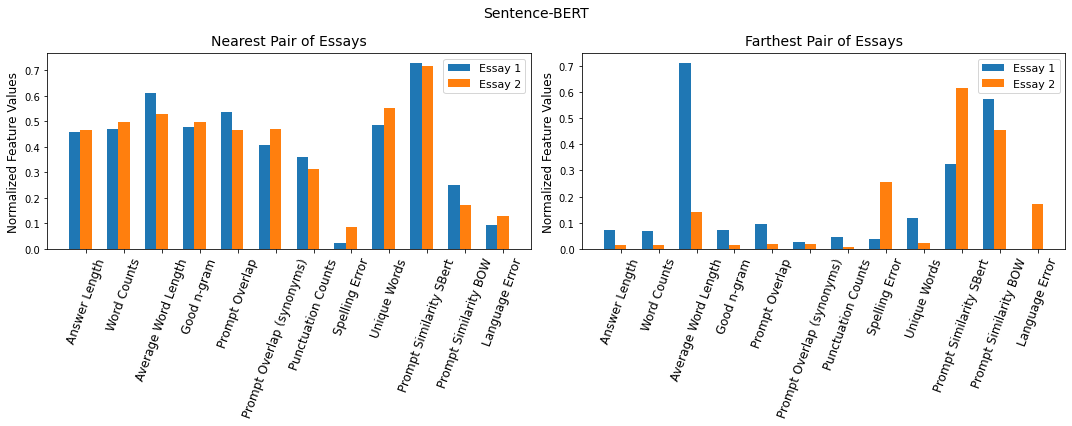

In [16]:
a = x_normed[160][:12]
b = x_normed[301][:12]

c = x_normed[967][:12]
d = x_normed[1015][:12]

ind = np.arange(12)
width = 0.3

plt.figure(figsize=(15,6))
plt.title("Feature Differences")
plt.suptitle("Sentence-BERT", fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Nearest Pair of Essays", fontsize=14, y=1.01)
ax1.bar(ind, a, width, align='center', label='Essay 1')
ax1.bar(ind + width, b, width, align='center', label='Essay 2')
ax1.set_ylabel("Normalized Feature Values", fontsize=12)
ax1.set_xticks(ind + width)
ax1.set_xticklabels(feats, fontdict=None, minor=False, fontsize=12, rotation=70)
ax1.legend(fontsize=11, loc='upper right')#, framealpha=0.5)#fancybox=True, shadow=True, borderpad=0.5)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Farthest Pair of Essays", fontsize=14, y=1.01)
ax2.bar(ind, c, width, align='center', label='Essay 1')
ax2.bar(ind + width, d, width, align='center', label='Essay 2')
ax2.set_ylabel("Normalized Feature Values", fontsize=12)
ax2.set_xticks(ind + width)
ax2.set_xticklabels(feats, fontdict=None, minor=False, fontsize=12, rotation=70)
ax2.legend(fontsize=11, loc='upper right')#, framealpha=0.5)#, fancybox=True, shadow=True, borderpad=0.5)

# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, bbox_to_anchor= (1, 1), fontsize = 18)

plt.tight_layout()
plt.savefig('nearest_farthest_sbert.png')
plt.show()

In [17]:
joblib.dump(a, 'near_1_sbert')
joblib.dump(b, 'near_2_sbert')
joblib.dump(c, 'far_1_sbert')
joblib.dump(d, 'far_2_sbert')

['far_2_sbert']

In [20]:
dist1d_sorted = np.sort(dist1d)
dist1d_sorted

array([0.        , 0.00201688, 0.00506619, ..., 0.99013434, 0.99137154,
       1.        ])

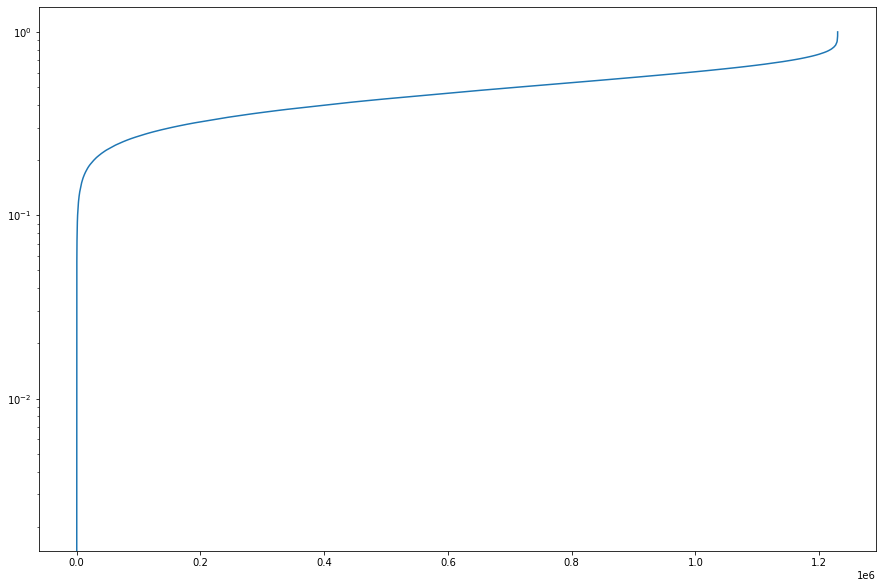

In [21]:
ind = np.arange(len(dist1d_sorted))

plt.figure(figsize=(15,10))
#plt.bar(ind, dist1d_sorted[:100])
#plt.hist(dist1d_sorted, bins=1000)
plt.plot(dist1d_sorted)
plt.yscale('log')
plt.show()

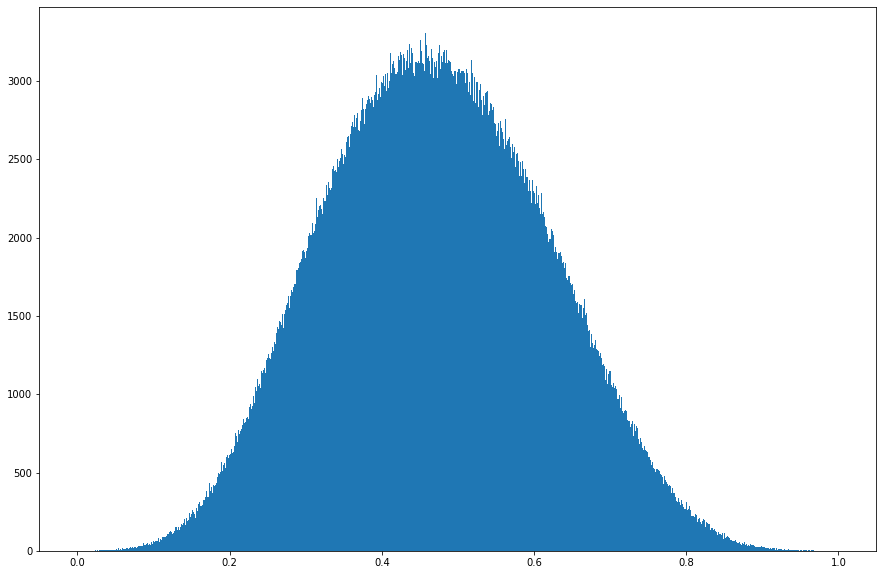

In [22]:
ind = np.arange(len(dist1d_sorted))

plt.figure(figsize=(15,10))
#plt.bar(ind, dist1d_sorted[:100])
plt.hist(dist1d_sorted, bins=1000)
#plt.plot(dist1d_sorted)
#plt.yscale('log')
plt.show()

In [23]:
import random
samples = random.sample(list(dist1d_sorted), 100)
#samples

In [24]:
samples_sorted = np.sort(samples)
#samples_sorted

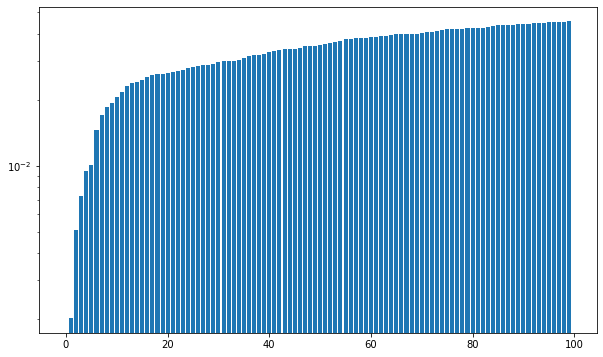

In [25]:
ind = np.arange(100)

plt.figure(figsize=(10,6))
plt.bar(ind, dist1d_sorted[:100])
#plt.hist(dist1d_sorted[:100], bins=10)
#plt.plot(samples_sorted)
plt.yscale('log')
plt.show()

In [26]:
#iterdist_sorted

In [27]:
def compute_difference(pairs):
    answer_length = []
    word_count = []
    avg_word_length = []

    feat_diff_all = []

    for pair in pairs:
        feat_diff = []

        idx1 = pair[0]
        idx2 = pair[1]

        feat1 = x_normed[idx1][:12]
        feat2 = x_normed[idx2][:12]

        for i in range(12):
            diff = abs(feat1[i] - feat2[i])
            feat_diff.append(diff)

        feat_diff_all.append(feat_diff)
    
    return feat_diff_all

## Nearest pairs

In [28]:
nearest_pairs_iter = iterdist_sorted[:10000]

nearest_pairs = [i[0] for i in nearest_pairs_iter]
#nearest_pairs

feat_diff_all = compute_difference(nearest_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

nearest_diff = b
nearest_diff

array([0.13214807, 0.13322625, 0.11008431, 0.13373658, 0.16068302,
       0.14935495, 0.07596272, 0.05380571, 0.13187677, 0.09438374,
       0.13720508, 0.04994428])

## Farthest pairs

In [29]:
farthest_pairs_iter = iterdist_sorted[-10000:]

farthest_pairs = [i[0] for i in farthest_pairs_iter]

feat_diff_all = compute_difference(farthest_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

farthest_diff = b
farthest_diff

array([0.15008736, 0.15256362, 0.19289057, 0.15318416, 0.17839119,
       0.16588559, 0.08137396, 0.08951761, 0.15828661, 0.3042381 ,
       0.19058269, 0.08138287])

## Medium distance

In [30]:
medium_pairs_iter = iterdist_sorted[610000:620000]

medium_pairs = [i[0] for i in medium_pairs_iter]

feat_diff_all = compute_difference(medium_pairs)

a = np.array(feat_diff_all)
b = np.mean(a, axis=0)

medium_diff = b
medium_diff

array([0.14930015, 0.15197104, 0.14934754, 0.15267616, 0.17316855,
       0.1595045 , 0.08425503, 0.07598643, 0.15331535, 0.17088081,
       0.17104183, 0.06788164])

In [31]:
nearest_diff < farthest_diff

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [32]:
nearest_diff < medium_diff

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [33]:
medium_diff < farthest_diff

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

In [34]:
feats

['Answer Length',
 'Word Counts',
 'Average Word Length',
 'Good n-gram',
 'Prompt Overlap',
 'Prompt Overlap (synonyms)',
 'Punctuation Counts',
 'Spelling Error',
 'Unique Words',
 'Prompt Similarity SBert',
 'Prompt Similarity BOW',
 'Language Error']

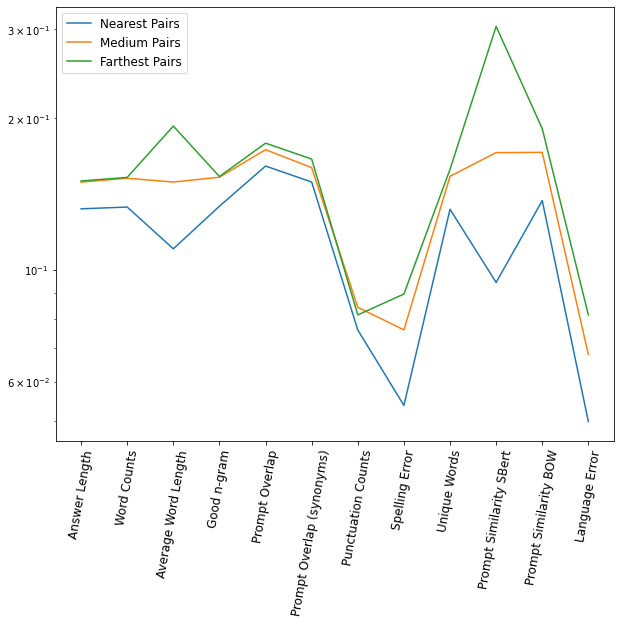

In [35]:
plt.figure(figsize=(10,8))
plt.plot(nearest_diff, label='Nearest Pairs')
plt.plot(medium_diff, label='Medium Pairs')
plt.plot(farthest_diff, label='Farthest Pairs')
plt.xticks(range(0,12), feats, fontsize=12, rotation=80)
plt.legend(fontsize=12)
plt.yscale('log')
plt.show()

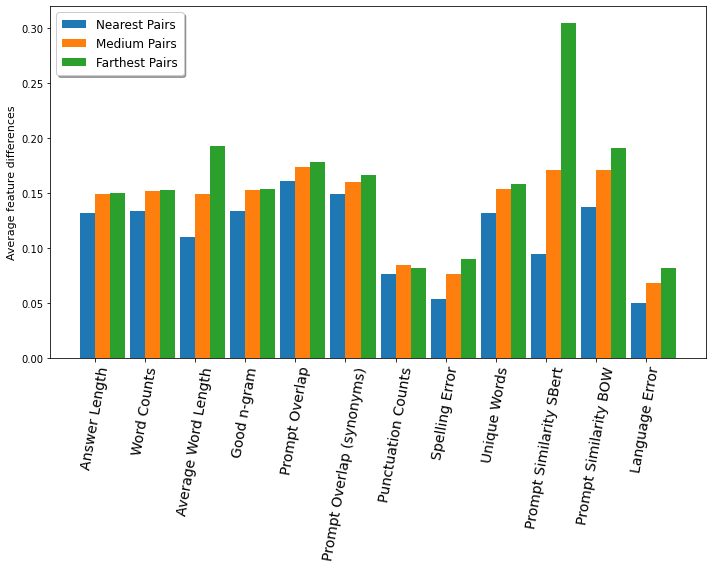

In [36]:
a = nearest_diff
b = medium_diff
c = farthest_diff

ind = np.arange(12)
width = 0.3

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.bar(ind, a, width, align='center', label='Nearest Pairs')
plt.bar(ind + width, b, width, align='center', label='Medium Pairs')
plt.bar(ind + width + width, c, width, align='center', label='Farthest Pairs')

plt.ylabel("Average feature differences", fontsize=11)
plt.xticks(ind + width / 2, feats, fontsize=14, rotation=80)
plt.tight_layout()
plt.legend(fontsize=12, fancybox=True, shadow=True, borderpad=0.5)#, frameon=False)
plt.savefig('gb_best_20.png')
plt.show()

In [37]:
joblib.dump(nearest_diff, 'nearest_diff_sbert')
joblib.dump(medium_diff, 'medium_diff_sbert')
joblib.dump(farthest_diff, 'farthest_diff_sbert')

['farthest_diff_sbert']

In [107]:
def compute_score_difference(pairs):
    score_diff_gb = []
    score_diff_rf = []
    score_diff_rr = []
    
    for pair in pairs:

        idx1 = pair[0]
        idx2 = pair[1]

        diff = abs(score_gb[idx1] - score_gb[idx2])
        score_diff_gb.append(diff)
        
        diff = abs(score_rf[idx1] - score_rf[idx2])
        score_diff_rf.append(diff)
        
        diff = abs(score_rr[idx1] - score_rr[idx2])
        score_diff_rr.append(diff)
    
    return score_diff_gb, score_diff_rf, score_diff_rr

In [115]:
a, b, c = compute_score_difference(nearest_pairs)

a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_nearest = [a,b,c]

a, b, c = compute_score_difference(medium_pairs)

a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_medium = [a,b,c]

a, b, c = compute_score_difference(farthest_pairs)

a = np.array(a)
a = np.mean(a, axis=0)
b = np.array(b)
b = np.mean(b, axis=0)
c = np.array(c)
c = np.mean(c, axis=0)

score_diff_farthest = [a,b,c]

10000


In [110]:
score_diff_nearest

[2.2500551121950148, 1.6425545000000001, 2.1369601]

In [111]:
score_diff_medium

[3.876154100370407, 2.8506200000000006, 3.7531154000000004]

In [112]:
score_diff_farthest

[4.4888714148521425, 3.517121000000001, 4.7117929]

In [113]:
joblib.dump(score_diff_nearest, 'score_diff_nearest_sbert')
joblib.dump(score_diff_medium, 'score_diff_medium_sbert')
joblib.dump(score_diff_farthest, 'score_diff_farthest_sbert')

['score_diff_farthest_sbert']